# **Praktikum I Machine Learning dan Modern Prediction**

'''
=================================================

Nama  : Risfa Fadila

NPM : F1F022015

Feature Engineering
=================================================
'''

# Latar Belakang

Kondisi cuaca, terutama kejadian hujan, memiliki dampak yang signifikan terhadap berbagai aspek kehidupan manusia, mulai dari sektor pertanian, kelancaran transportasi, hingga perencanaan aktivitas sehari-hari. Kemampuan untuk memprediksi terjadinya hujan secara akurat menjadi sangat krusial untuk mitigasi risiko dan pengambilan keputusan yang lebih baik (Zhang, et al. 2021).

Dalam melakukan analisis pada sistem prediksi cuaca berbasis data, masalah yang sering dialami peneliti yaitu data yang tersedia. Kebanyakan data cuaca yang diperoleh itu sering terjadi missing value. Serta, data seperti suhu, kelembapan, dan kecepatan angin sering kali memiliki nilai yang beragam dan terkadang mengandung nilai ekstrem yang bisa mengganggu kinerja model. Selain itu, masalah ketidakseimbangan antara hari hujan dan hari tidak hujan dimana hari tidak hujan jauh lebih banyak—membuat model machine learning cenderung memprediksi hari tidak hujan saja dan kurang mampu mendeteksi hari hujan, yang sebenarnya menjadi fokus utama. Kondisi ini menyebabkan model prediktif konvensional cenderung bias dan gagal mengenali kejadian hujan, meskipun memiliki akurasi keseluruhan yang tampak tinggi (Hidayat & Al-Hakim, 2022). Penelitian terdahulu menunjukkan bahwa penerapan teknik preprocessing yang tepat, seperti penanganan outlier dan penskalaan fitur (feature scaling), sangat penting untuk menstabilkan kinerja algoritma (Gupta & Kumar, 2020).

Pada praktikum kali ini bertujuan mengembangkan model prediksi hujan yang akurat menggunakan algoritma Logistic Regression.
Penelitian ini fokus pada penerapan teknik feature engineering yang lengkap, seperti menangani missing value, nilai ekstrem dengan metode IQR dan capping, melakukan scaling, serta encoding data. Selain itu, Untuk mengatasi masalah ketidakseimbangan data, teknik resampling seperti Synthetic Minority Over-sampling Technique (SMOTE) telah terbukti efektif. SMOTE bekerja dengan mensintesis data baru untuk kelas minoritas, sehingga membuat distribusi kelas menjadi lebih seimbang dan meningkatkan sensitivitas model terhadap deteksi hujan tanpa sekadar menduplikasi data lama (Susanto & Suryadi, 2023). Beberapa penelitian di Indonesia juga menunjukkan bahwa penerapan SMOTE mampu meningkatkan performa prediksi secara signifikan pada kasus data meteorologi dan lingkungan yang tidak seimbang (Pratama, 2021).

Pendekatan ini diharapkan bisa menghasilkan model yang tidak hanya akurat secara umum, tetapi juga mampu mendeteksi hari hujan dengan sensitivitas yang tinggi.

# Rumusan Masalah

Adapun rumusan masalah penelitian kali ini yaitu:
1. Apa saja jenis feature engineering pada
Python?
2. Bagaimana cara melakukan teknik feature engineering di program
Python?

# Tujuan Penelitian

Adapun tujuan penelitian kali ini yaitu:
1. Mahasiswa memahami konsep dari berbagai jenis feature engineering pada
Python
2. Mahasiswa dapat melakukan teknik feature engineering di program
Python.

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [1]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 5.7 MB/s eta 0:00:00


In [2]:
# Define Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Encoding
from sklearn.preprocessing import OneHotEncoder

#Handling Outlier
from feature_engine.outliers import Winsorizer

#Balancing Data
from imblearn.over_sampling import SMOTE

#model ML
from sklearn.linear_model import LogisticRegression

#model performence
from sklearn.metrics import classification_report, f1_score

# Memuat Data

Sebelum kita membahas lebih jauh tentang Feature Engineering, berikut ini adalah beberapa dataset yang akan digunakan untuk memperjelas tujuan dari notebook ini. Data yang digunakan pada penelitian merupakan data skunder yang yang diberikan oleh Asisten Praktikum pada link berikut https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data_penelitian.csv.

In [3]:
# Load penelitian Dataset

df_ori = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data_penelitian.csv', sep=';')
data_pt1 = df_ori.copy()
data_pt1.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,NaN
1,1,24.0,90,1.0,NaN
2,1,26.8,77,1.0,NaN
3,1,29.6,62,2.0,2.0
4,1,30.8,56,1.0,7.0
5,1,31.0,55,1.0,7.0
6,1,30.4,57,3.0,9.0
7,2,30.9,58,2.0,10.0
8,2,30.2,62,2.0,8.0
9,2,29.7,62,2.0,7.0


In [4]:
# Melihat dimensi data
data_pt1.shape

(743, 5)

In [5]:
#melihat tipe data
data_pt1.dtypes

,0
Hujan,int64
Suhu Udara,float64
Kelembapan,int64
Keadaan Cuaca,float64
Kecepatan Angin,float64


# Analisis Data Eksploratif

Sebelum dilakukan analisis data lebih lanjut, terlebih dahulu dilakukan ekplorasi data. Beikut ditampilkan hasil statistik deskriptif dari data iklim yang digunakan pada penelitian ini.

In [6]:
print(data_pt1.describe())

            Hujan  Suhu Udara  Kelembapan  Keadaan Cuaca  Kecepatan Angin
count  743.000000  743.000000  743.000000     734.000000       429.000000
mean     1.779273   26.540915   83.881561      15.107629         6.655012
std      0.415016    2.557152   11.561250      24.923088         3.352688
min      1.000000   22.600000   52.000000       1.000000         2.000000
25%      2.000000   24.300000   75.000000       2.000000         4.000000
50%      2.000000   26.000000   86.000000       2.000000         6.000000
75%      2.000000   28.900000   94.000000      15.000000         9.000000
max      2.000000   32.000000  100.000000      97.000000        21.000000


# _Feature Engineering_

## A - Missing Value

Data hilang (***missing data***) atau nilai hilang (***missing values***) terjadi ketika tidak ada data atau nilai yang tersimpan untuk suatu observasi pada variabel tertentu.

Kehilangan data adalah hal yang sering terjadi, baik dalam kompetisi data science maupun di dunia bisnis, dan dapat mempengaruhi kesimpulan yang diambil dari data tersebut. **Data yang tidak lengkap merupakan masalah yang tidak bisa dihindari saat bekerja dengan berbagai sumber data.**

---
### - Kenapa data hilang (data missing)?

Ada berbagai alasan mengapa data bisa hilang, antara lain:
* Nilai bisa **hilang** atau **tidak tersimpan dengan benar** saat proses pengumpulan data.
  
  Misalnya, data berasal dari survei yang diisi secara manual ke dalam formulir online. Petugas entri data bisa saja lupa mengisi satu kolom dalam formulir tersebut, sehingga nilai pada kolom itu menjadi hilang.

* **Nilai memang tidak ada.**

  Contohnya: untuk variabel yang dihitung dari hasil pembagian antara dua variabel, seperti rasio utang terhadap pendapatan. Jika seseorang tidak memiliki pendapatan, maka nilai rasio tersebut tidak dapat dihitung karena pembagian dengan nol tidak terdefinisi.


* Data hilang juga bisa terjadi karena **responden menolak menjawab** pertanyaan tertentu dalam formulir.
  
  Misalnya, seseorang mungkin enggan mengungkapkan jumlah pendapatannya. Akibatnya, nilai untuk variabel “pendapatan” akan menjadi hilang bagi orang tersebut.

Selain memahami penyebab hilangnya data, **penting juga untuk memahami mekanisme bagaimana nilai-nilai yang hilang itu muncul dalam dataset**.
Tergantung pada mekanismenya, kita bisa memilih untuk memproses nilai yang hilang dengan cara yang berbeda. Selain itu, dengan mengetahui sumber data yang hilang, kita juga bisa mengambil langkah untuk mengendalikan sumber tersebut, dan mengurangi jumlah data yang hilang di masa depan selama proses pengumpulan data.

In [7]:
# Check Missing Values

data_pt1.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,9
Kecepatan Angin,314


Dari hasil tersebut terlihat bahwa terdapat data hilang pada variabel keadaan cuaca sebanyak 9 data dan variabel kecepatan angin sebanyak 314 data.

In [8]:
# Check Missing Values as Percentage to Total Data

data_pt1.isnull().mean()

,0
Hujan,0.000000
Suhu Udara,0.000000
Kelembapan,0.000000
Keadaan Cuaca,0.012113
Kecepatan Angin,0.422611


In [9]:
#Missing value kolom Keadaan Cuaca
data_pt1[data_pt1['Keadaan Cuaca'].isnull()].head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
41,2,26.0,92,NaN,NaN
206,1,23.8,98,NaN,5.0
309,1,23.3,97,NaN,NaN
511,2,28.8,79,NaN,12.0
597,2,24.6,92,NaN,NaN
638,1,22.8,98,NaN,4.0
674,2,25.5,96,NaN,NaN
722,2,27.0,80,NaN,4.0
724,2,31.0,57,NaN,6.0


### Penanganan Data Missing

#### -Imputasi Missing Data

Untuk mengatasi missing value tersebut dilakukan imputasi untuk variabel yang memiliki missing value yaitu Kecepatan Angin dan Keadaan Hujan. Metode imputasi yang digunakan untuk variabel Kecepatan Angin yaitu imputasi mean, dimana nilai yang hilang akan diisi oleh nilai mean Kecepatan Angin pada data tersebut.
Sedangkan untuk variabel Keadaan Hujan metode imputasi yang digunakan yaitu imputasi modus dengan mengisi nilai yang  hilang dengan nilai modus Keadaan Cuaca pada data tersebut.

In [10]:
df_imp2=data_pt1.copy()
# Hitung nilai mean
mean_value = df_imp2['Kecepatan Angin'].mean()
# Isi NaN dengan mean
df_imp2['Kecepatan Angin'] = df_imp2['Kecepatan Angin'].fillna(mean_value)

In [11]:
# Isi NaN dengan modus
mode_value = df_imp2['Keadaan Cuaca'].mode()[0]
df_imp2['Keadaan Cuaca'] = df_imp2['Keadaan Cuaca'].fillna(mode_value)

In [12]:

df_imp2.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,0


In [13]:
df_imp4=df_imp2.copy()

## B - Kardinalitas

Kardinalitas merujuk pada jumlah nilai unik, atau label, yang terdapat dalam
suatu variabel kategoris. Konsep ini digunakan untuk mengukur granularitas atau
keunikan data dalam sebuah fitur.

In [14]:
df_imp4.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,6.655012
1,1,24.0,90,1.0,6.655012
2,1,26.8,77,1.0,6.655012
3,1,29.6,62,2.0,2.000000
4,1,30.8,56,1.0,7.000000
5,1,31.0,55,1.0,7.000000
6,1,30.4,57,3.0,9.000000
7,2,30.9,58,2.0,10.000000
8,2,30.2,62,2.0,8.000000
9,2,29.7,62,2.0,7.000000


In [15]:
df_imp4['Keadaan Cuaca'].unique()

array([ 5.,  1.,  2.,  3., 14., 60., 61., 21., 29., 10., 16., 62., 63.,
       65., 15., 17., 13., 95., 91., 97.])

Pada variabel Keadaan Cuaca ditampilkan nilai unik yang merupakan ketegori dari variabel tersebut, jumlah  nilai unik inilah yang disebut dengan kardinalitas. Terdapat 21 nilai unik yang artinya kardinalitas variabel Keadaan Cuaca adalah 21.

In [16]:
#Mengurangi Kardinalitas

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
### 2. Tentukan Label untuk Setiap Bin
# 10 label (0 s/d 9)
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### 3. Terapkan pd.cut
df_imp4['Keadaan_Cuaca_reduced'] = pd.cut(
    df_imp4['Keadaan Cuaca'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

### 4. Verifikasi
print("--- Hasil Perbandingan ---")
# Menampilkan 10 data acak untuk melihat perubahannya
print(df_imp4.sample(10))

print("\n--- Pengecekan Kardinalitas ---")
print('Jumlah kategori di "Keadaan Cuaca" asli : {}'.format(len(df_imp4['Keadaan Cuaca'].unique())))
print('Jumlah kategori di "Keadaan_Cuaca_reduced" : {}'.format(len(df_imp4['Keadaan_Cuaca_reduced'].unique())))

print("\nKategori unik yang baru (reduced):")
print(df_imp4['Keadaan_Cuaca_reduced'].unique())

--- Hasil Perbandingan ---
     Hujan  Suhu Udara  Kelembapan  Keadaan Cuaca  Kecepatan Angin  \
657      2        28.4          81           29.0        10.000000   
168      2        23.6          96            2.0         6.655012   
569      2        23.5         100           65.0         6.655012   
241      2        25.7          81            2.0         3.000000   
195      2        27.1          77            1.0         5.000000   
174      2        27.6          83            2.0        10.000000   
309      1        23.3          97            2.0         6.655012   
451      2        25.6          95            1.0         6.655012   
511      2        28.8          79            2.0        12.000000   
457      2        26.4          89            5.0         6.655012   

    Keadaan_Cuaca_reduced  
657                     2  
168                     0  
569                     6  
241                     0  
195                     0  
174                     0  
309   

Selanjutnya dilakukan pengurangan kardinalitas pada variabel keadaan cuaca yang awalnya tedapat 21 kategorik unik diubah menjadi 6 kategori saja yaitu 0, 1, 5, 6, dan 9.

## C- Splitting Data

Sebelum dilakukan analis langkah yang perlu dilakukan terlebih dahulu yaitu splitting atau membagi data. Untuk menilai seberapa baik sebuah model akan menggeneralisasi ke data baru, data yang tersedia dibagi menjadi data latih (yang digunakan untuk membangun model) dan data uji (yang digunakan untuk mengevaluasi kinerjanya) (Müller & Guido, 2017).

Drai dataset yang digunakan didefinisikan variabel prediktor (X) dan respon (Y), dimana Hujan sebagai variabel respon dan variabel lainnya sebagai varaibel predktor yang diduga mempengaruhi hujan.

In [17]:
#mendeskripsikan variabel X dan y
df_imp4=df_imp4.drop('Keadaan Cuaca', axis = 1)
X= df_imp4.drop('Hujan', axis = 1)
y=df_imp4['Hujan']

In [41]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=350, stratify=y)
X_test.shape

(186, 4)

Data tersebut baik variabel X dan Variabel Y dipisah menjadi data training dan data testing dengan perbandingan 75% Training : 25% Testing. Diperoleh X_train dan Y_train untuk data training serta X_test dan y_test untuk data testing. Dimana digunakan "stratify=y" agar memastikan bahwa pembagian data mempertahankan proporsi kelas yang sama sesuai variabel Y seperti pada data aslinya.

## D- Handling Outlier

Tahap ini bertujuan untuk mengidentifikasi adanya outlier (pencilan) pada variabel numerik dalam data latih (X_train), yaitu 'Suhu Udara', 'Kelembapan', dan 'Kecepatan Angin'. Deteksi outlier penting dilakukan karena nilai-nilai ekstrem dapat mendistorsi model statistik dan mengurangi performa model machine learning.

In [42]:
#buat list fitur numerik
list_num = ['Suhu Udara', 'Kelembapan', 'Kecepatan Angin']
# Hitung IQR
list_outlier=[]
list_lower_bound =[]
list_upper_bound =[]
for i in X_train[list_num]:
    Q1 = np.percentile(X_train[i], 25)
    Q3 = np.percentile(X_train[i], 75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    list_lower_bound.append(lower_bound)
    list_upper_bound.append(upper_bound)

    # Hitung jumlah outlier di bawah batas bawah dan di atas batas atas
    num_outliers_lower = np.sum(X_train[i] < lower_bound)
    num_outliers_upper = np.sum(X_train[i] > upper_bound)

    # Jumlah total outlier
    total_outliers = num_outliers_lower + num_outliers_upper
    list_outlier.append(total_outliers)

#Mendefinikan dataframe baru mengenai outliers
outliers = pd.DataFrame()
outliers['Kolom'] = list_num
outliers['Jumlah Outlier'] = list_outlier
outliers['Lower Bound'] = list_lower_bound
outliers['Upper Bound'] = list_upper_bound
outliers

,Kolom,Jumlah Outlier,Lower Bound,Upper Bound
0,Suhu Udara,0,17.5,35.9
1,Kelembapan,0,45.5,121.5
2,Kecepatan Angin,49,2.0,10.0


Dari hasil analisa terdeteksi sebanyak 49 outlier pada variabel Kecepatan Angin. Adanya 49 titik data di luar rentang ini mengindikasikan adanya nilai kecepatan angin yang sangat rendah atau sangat tinggi (ekstrem) dibandingkan mayoritas data lainnya.

In [20]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
df_num = X_train[list_num]
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan', 'Kecepatan Angin']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara']


Analisis skewness dilakukan untuk mengevaluasi simetri distribusi data pada fitur numerik ('Suhu Udara', 'Kelembapan', dan 'Kecepatan Angin'), dengan tujuan menentukan apakah data tersebut berdistribusi normal (simetris) atau miring (skewed). Langkah ini krusial karena karakteristik distribusi data akan memandu pemilihan metode preprocessing selanjutnya.

Setelah dilihat sebaran datanya, diketahui bahwa kolom fitur kecepatan angin memiliki distribusi miring/sedang (skewed), artinya datanya tidak simetris sempurna.

#### Capping

In [21]:
# Capping the skew distribution

winsoriser_Kecepatan_Angin = Winsorizer(capping_method='iqr', #gaussian for normal distribution
                            tail='both',
                            fold=1.5,
                            variables=['Kecepatan Angin'],
                            missing_values='ignore')

X_train_capped = winsoriser_Kecepatan_Angin.fit_transform(X_train)
X_test_capped = winsoriser_Kecepatan_Angin.transform(X_test)

print('Size dataset - Before capping : ', X_train.shape)
print('Size dataset - After capping  : ', X_train_capped.shape)

Size dataset - Before capping :  (557, 4)
Size dataset - After capping  :  (557, 4)


Untuk menangani outlier yang signifikan pada fitur 'Kecepatan Angin', diterapkan teknik capping, atau secara statistik dikenal sebagai Winsorizing.

Menurut John W. Tukey yang mempopulerkan metode ini, Winsorizing adalah proses transformasi data dengan cara mengganti nilai-nilai ekstrem (di luar batas yang ditentukan) dengan nilai batas itu sendiri, alih-alih menghapusnya. Tujuannya adalah untuk mengurangi dampak outlier terhadap model statistik tanpa mengurangi jumlah sampel data (Zheng, A., & Casari, A, 2018)

#### visualisasi

In [22]:
#Defining a function to create histogram and box plot for certain variables
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='teal')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='teal')
    plt.title('Boxplot')

    plt.show()

Suhu Udara - Before Capping


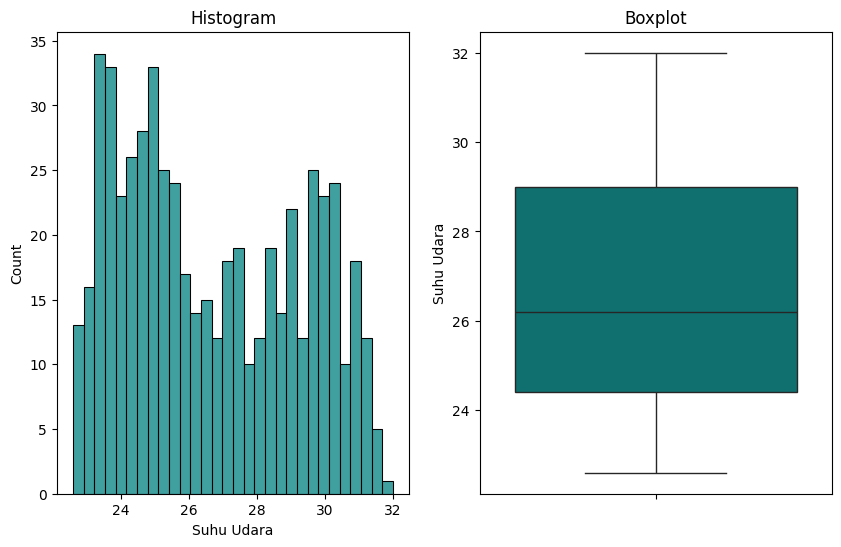


Suhu Udara - After Capping


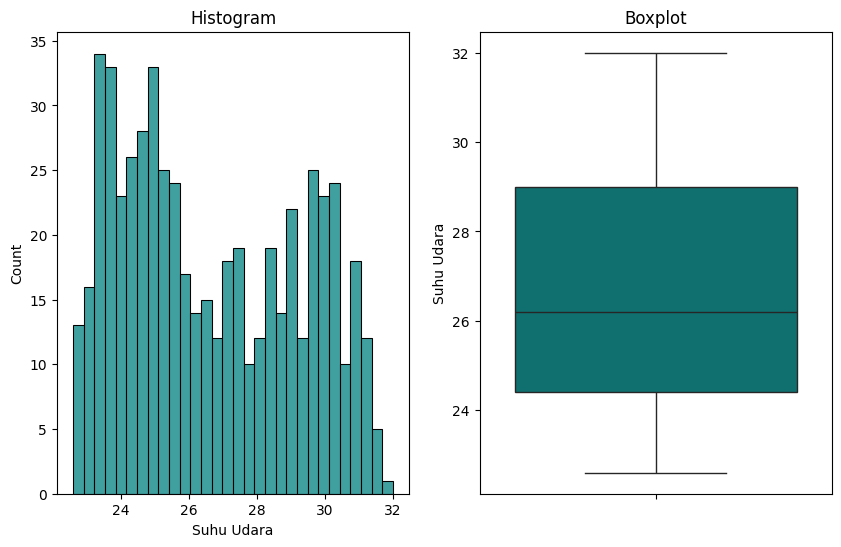

Kelembapan - Before Capping


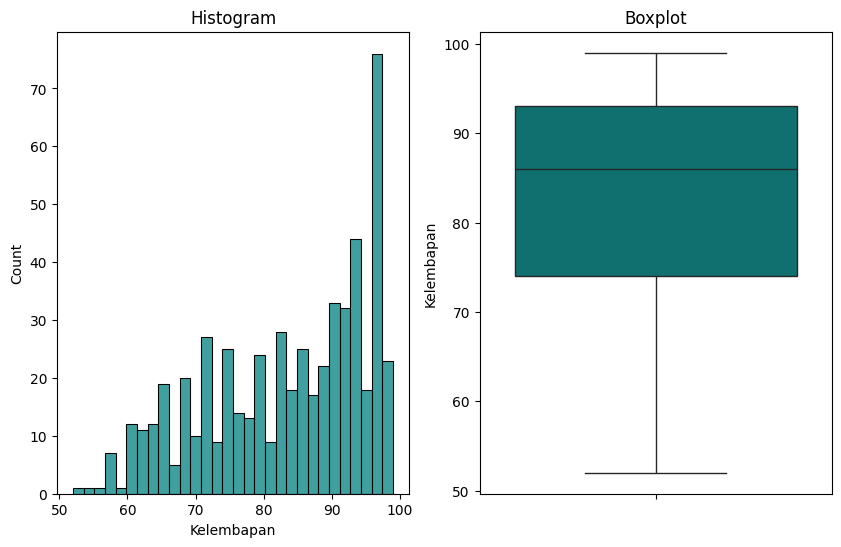


Kelembapan - After Capping


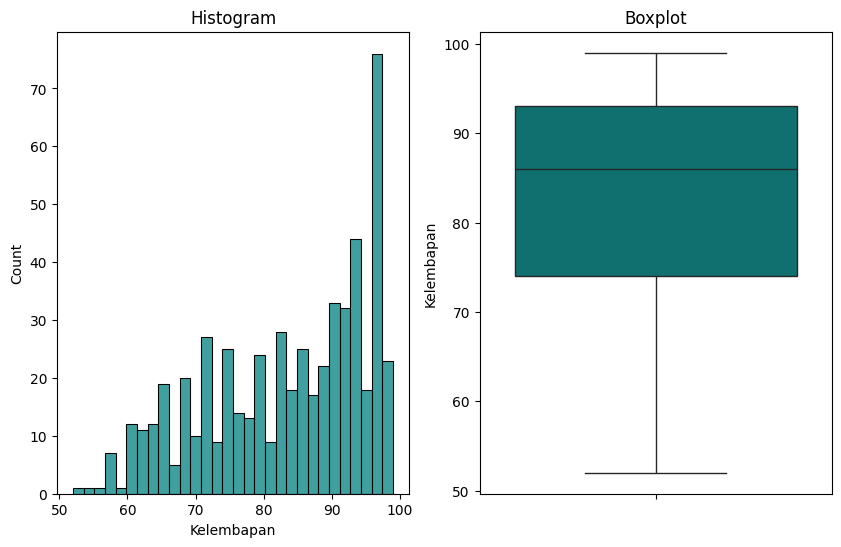

Kecepatan Angin - Before Capping


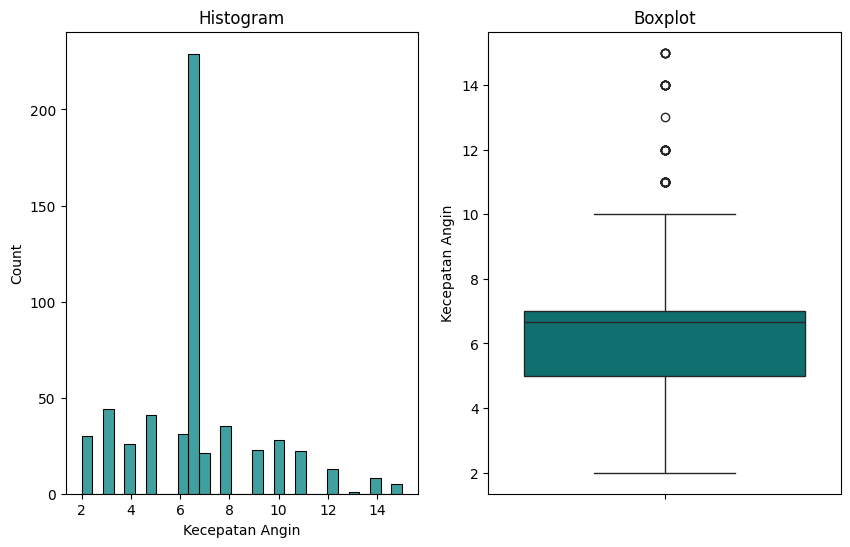


Kecepatan Angin - After Capping


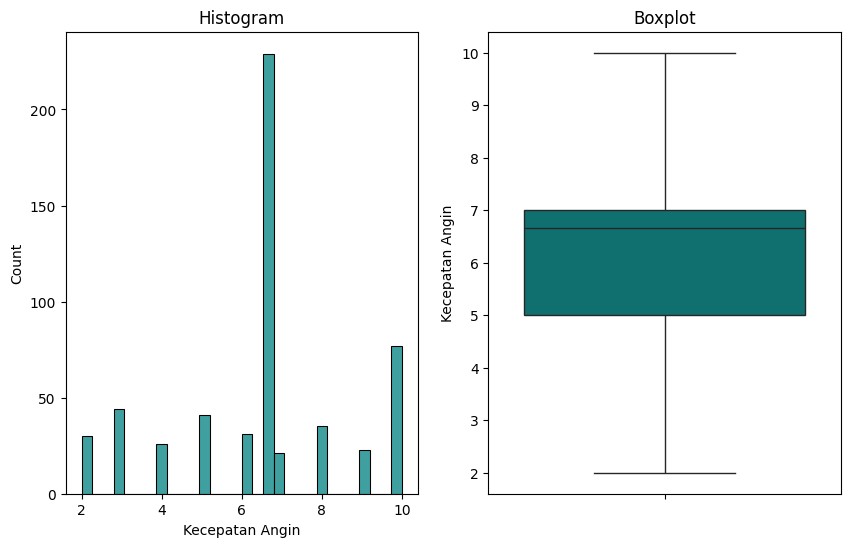

In [23]:
# Plotting histogram and boxplot before and after capping
for col in list_num:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)


Melalui visualisasi perbandingan antara sebelum dilalukan capping dengan setelah dilakukan capping. Pada variabel Suhu Udara dan Kelembapan tidak ada outlier yang terdeteksi, sehingga proses capping tidak mengubah distribusi data. Visualisasi (histogram dan boxplot) terlihat identik dengan kondisi sebelum capping.

Kemudian pada varaibel Kecepatan Angin setelah penerapan Capping, nilai-nilai ekstrem sebelumnya telah digantikan dengan nilai batas atas/bawah yang ditentukan. Boxplot kini tidak lagi menunjukkan adanya titik outlier, dan histogram menunjukkan rentang data yang lebih terbatas, menandakan bahwa outlier telah berhasil ditangani tanpa menghapus data.

## E- Scaling

Tahapan selanjutnya yaitu dilakukan scalling, yang bertujuan untuk menyamakan rentang nilai (skala) dari fitur-fitur numerik yang berbeda. Scaling didefinisikan sebagai proses transformasi matematis pada data numerik untuk menempatkannya dalam skala yang umum, biasanya dalam rentang [0, 1] untuk Normalization (Min-Max Scaling) atau dengan rata-rata 0 dan standar deviasi 1 untuk Standardization (Z-score Scaling), guna mempercepat konvergensi algoritma dan meningkatkan performa model secara keseluruhan (Ahsan, et al., 2021)

In [24]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train_capped[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara', 'Kecepatan Angin']


In [25]:
#melakukan scalling menggunakan standard scaller
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_capped[nilai_skew_normal])
X_train_capped[nilai_skew_normal] = standard_scaler.transform(X_train_capped[nilai_skew_normal])
X_test_capped[nilai_skew_normal] = standard_scaler.transform(X_test_capped[nilai_skew_normal])

In [26]:
#melakukan scalling menggunakan robust scaller
robust_scaler = RobustScaler()
robust_scaler.fit(X_train_capped[nilai_skew])
X_train_capped[nilai_skew] = robust_scaler.transform(X_train_capped[nilai_skew])
X_test_capped[nilai_skew] = robust_scaler.transform(X_test_capped[nilai_skew])

In [27]:
X_train_scale = X_train_capped
X_test_scale = X_test_capped

In [28]:
X_train_scale

,Suhu Udara,Kelembapan,Kecepatan Angin,Keadaan_Cuaca_reduced
71,-1.343532,0.631579,0.076534,6
558,0.013364,0.000000,1.629115,6
614,-0.878311,0.473684,-2.084096,6
597,-0.800774,0.315789,0.076534,0
23,-1.382301,0.315789,0.076534,0
...,...,...,...,...
362,0.362280,-0.684211,-0.691642,0
313,-0.645700,0.368421,-0.691642,0
5,1.680407,-1.631579,0.236661,0
589,0.052132,0.105263,0.076534,5


## F- Encoding

### One Hot Encoder

In [29]:
list_cat = ['Keadaan_Cuaca_reduced']

encoder = OneHotEncoder()

#melakukan encoding
X_train_encoded = encoder.fit_transform(X_train_scale[list_cat])
X_test_encoded = encoder.transform(X_test_scale[list_cat])

Tahap Encoding dilakukan menggunakan teknik One-Hot Encoding pada fitur kategorikal 'Keadaan_Cuaca_reduced'. Tujuan utama dari proses ini adalah untuk mengubah data kategori yang berbentuk teks menjadi format numerik biner (0 dan 1) agar dapat diproses oleh algoritma machine learning. Proses ini diterapkan secara konsisten pada data training (X_train) melalui *fit_transform* dan data testing (X_test) melalui *transform* untuk menjaga keselarasan struktur data.

## G- Balancing Data

In [30]:
y_train

,Hujan
71,1
558,2
614,1
597,2
23,2
...,...
362,1
313,2
5,1
589,2


In [31]:
y_train.value_counts()

,count
Hujan,
2,434
1,123


Dari hasil diatas terlihat bahwa nilai variabel Y tidak seimbang antara kategori 2 dan 1. Tahap selanjutnya adalah penyeimbangan kelas (class balancing) menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan banyak nilai data tersebut.

In [32]:
# Oversampling with SMOTE

smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)     # Minority Class will have same the same number as the majority class
# smote = SMOTE(sampling_strategy={1:1000}, k_neighbors=5, random_state=42)     # Minority Class will have 1000 data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)
y_train_balanced.value_counts()

,count
Hujan,
1,434
2,434


SMOTE adalah teknik oversampling yang digunakan untuk mengatasi masalah ketidakseimbangan kelas pada dataset. Alih-alih hanya menduplikasi data dari kelas minoritas (yang jumlahnya sedikit), SMOTE membuat data sintetis baru yang mirip dengan data asli.

Sekarang, dataset training (X_train_balanced, y_train_balanced) sudah seimbang dan siap digunakan untuk melatih model tanpa risiko bias akibat jumlah data yang timpang.

# _Training Model_

In [33]:
#tanpa feature engineering
lr_1 = LogisticRegression()
lr_1.fit(X_train, y_train)

LogisticRegression()

In [35]:
#dengan feature engineering
lr_2 = LogisticRegression()
lr_2.fit(X_train_encoded, y_train)

LogisticRegression()

In [36]:
#dengan feature engineering dan balancing data
lr_3 = LogisticRegression()
lr_3.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

# _Model Performance_

In [37]:
# Check Results - without Handling

print(classification_report(y_train, lr_1.predict(X_train)))
print(classification_report(y_test, lr_1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.50      0.11      0.17       123
           2       0.79      0.97      0.87       434

    accuracy                           0.78       557
   macro avg       0.65      0.54      0.52       557
weighted avg       0.73      0.78      0.72       557

              precision    recall  f1-score   support

           1       0.67      0.20      0.30        41
           2       0.81      0.97      0.88       145

    accuracy                           0.80       186
   macro avg       0.74      0.58      0.59       186
weighted avg       0.78      0.80      0.76       186



In [38]:
# Check Results - with Handling

print(classification_report(y_train, lr_2.predict(X_train_encoded)))
print(classification_report(y_test, lr_2.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.56      0.22      0.32       123
           2       0.81      0.95      0.88       434

    accuracy                           0.79       557
   macro avg       0.69      0.59      0.60       557
weighted avg       0.76      0.79      0.75       557

              precision    recall  f1-score   support

           1       0.62      0.32      0.42        41
           2       0.83      0.94      0.88       145

    accuracy                           0.81       186
   macro avg       0.72      0.63      0.65       186
weighted avg       0.78      0.81      0.78       186



In [39]:
# Check Results - with Handling

print(classification_report(y_train_balanced, lr_3.predict(X_train_balanced)))
print(classification_report(y_test, lr_3.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.77      0.34      0.48       434
           2       0.58      0.90      0.70       434

    accuracy                           0.62       868
   macro avg       0.67      0.62      0.59       868
weighted avg       0.67      0.62      0.59       868

              precision    recall  f1-score   support

           1       0.53      0.44      0.48        41
           2       0.85      0.89      0.87       145

    accuracy                           0.79       186
   macro avg       0.69      0.66      0.67       186
weighted avg       0.78      0.79      0.78       186



**interpretasi:**
Model 1: Tanpa Handling (Baseline)
Model ini memiliki akurasi keseluruhan yang tampak tinggi 80% pada data uji, namun odel sangat bias ke kelas Kelas 2. Kemampuannya mendeteksi Kelas 1 sangat buruk, hanya mampu mengenali 20% (Recall 0.20) dari data aktual Kelas 1 di data uji.


Model 2: Dengan Feature Engineering (Tanpa Balancing)
Proses scaling, encoding, dan penanganan outlier memberikan dampak positif. Model mulai mengenali pola Kelas 1 lebih baik, terlihat dari peningkatan Recall Kelas 1 pada data uji menjadi 32% (0.32) dan F1-Score naik menjadi 0.42. Model ini memiliki akurasi keseluruhan yang tinggi yaitu 81% pada data uji.

Model 3: Dengan Feature Engineering (Dengan Balancing)
Ini adalah model yang paling seimbang. Penggunaan Blaancing berhasil mengatasi bias model terhadap kelas 2 yang mayoritas. Kemampuan deteksi Kelas 1 meningkat signifikan, mencapai Recall tertinggi pada data uji yaitu 44% (0.44). Meskipun nilai akurasi keseluruhan menurun yaitu 79%.

# Kesimpulan

Percobaan ini bertujuan untuk mengevaluasi efektivitas teknik feature engineering dalam meningkatkan kinerja model Logistic Regression pada dataset yang tidak seimbang (imbalanced dataset). Berdasarkan analisis perbandingan tiga skenario model, diperoleh kesimpulan sebagai berikut:

1. Model awal yang dilatih pada data asli menunjukkan bias yang signifikan terhadap kelas mayoritas (Kelas 2). Meskipun mencapai akurasi sekitar 80%, model ini gagal dalam fungsi kritisnya untuk mendeteksi kelas Kelas 1.
2. Penerapan teknik Feature Engineering memberikan perbaikan awal pada kemampuan model dalam mengenali pola data. Pada data yang tidak seimbang terjadi peningkatan pada deteksi Kelas 1 (Recall naik menjadi 32%), membuktikan bahwa kualitas data input sangat mempengaruhi kemampuan belajar model.
3. Implementasi Balancing Data dengan SMOTE (Synthetic Minority Over-sampling Technique) menjadi faktor kunci dalam menyeimbangkan kemampuan prediksi model. Model Model 3 berhasil mengatasi masalah bias dengan sangat efektif meskipun menyebabkan sedikit penurunan pada akurasi total (dari 81% menjadi 79%).

Secara keseluruhan, rangkaian proses feature engineering yang dilakukan terbukti esensial untuk membangun model klasifikasi yang reliabel dan robust pada kasus data tidak seimbang.



# Referensi

Gupta, A., & Kumar, P. (2020). "Impact of Feature Scaling and Outlier Removal on Weather Prediction Models." Procedia Computer Science.

Hidayat, R., & Al-Hakim, S. (2022). "Handling Imbalanced Data in Rainfall Classification using Hybrid Sampling Methods." International Journal of Advances in Intelligent Informatics.

Müller, A. C., & Guido, S. (2017). Introduction to Machine Learning with Python: A Guide for Data Scientists. O'Reilly Media. (Sangat praktis dan sering digunakan sebagai referensi untuk implementasi, terutama dengan Scikit-learn).

Pratama, A. R. (2021). "Optimasi Prediksi Cuaca Menggunakan Algoritma Logistic Regression dan Teknik SMOTE pada Data BMKG." Indonesian Journal of Computing and Cybernetics Systems (IJCCS), UGM.

Susanto, A., & Suryadi, D. (2023). "Penerapan Metode SMOTE untuk Mengatasi Imbalanced Class pada Klasifikasi Data Cuaca." Jurnal RESTI (Rekayasa Sistem dan Teknologi Informasi), 7(x), hal-hal.

Tukey, John W. (1962). "The Future of Data Analysis". The Annals of Mathematical Statistics, 33(1), 1–67.

Zhang, Y., et al. (2021). "Deep learning in weather forecasting: A survey of recent operational applications." Artificial Intelligence for Earth Systems.

Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. O'Reilly Media.